# Introduction to Machine Learning and Toolkit Exercises

## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [82]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']

## Question 1

Load the data from the file using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [83]:
import pandas as pd

df = pd.read_csv('/content/Iris_Data.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Number of data points

In [84]:
df.shape

(150, 5)

Number of Columns

In [85]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

Datatype of each column

In [86]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [87]:
s = df['species']
s

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [88]:
s = s.str.replace('Iris-','')

In [89]:
df['species'] = s

In [90]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [91]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [92]:
df_description = df.describe()
df_description.rename(index={'50%': 'median'}, inplace='true')

In [113]:
sepal_length_data = df['sepal_length'].describe()
sepal_length_range = sepal_length_data['max'] - sepal_length_data['min']
sepal_length_range

3.6000000000000005

In [114]:
sepal_width_data = df['sepal_width'].describe()
sepal_width_range = sepal_width_data['max'] - sepal_width_data['min']
sepal_width_range

2.4000000000000004

In [115]:
petal_length_data = df['petal_length'].describe()
petal_length_range = petal_length_data['max'] - petal_length_data['min']
petal_length_range

5.9

In [116]:
petal_width_data = df['petal_width'].describe()
petal_width_range = petal_width_data['max'] - petal_width_data['min']
petal_width_range

2.4

In [117]:
new_row = {'sepal_length':sepal_length_range, 'sepal_width':sepal_width_range, 'petal_length':petal_length_range, 'petal_width':petal_width_range}
df_description = df_description.append(new_row, ignore_index=True)

<ipython-input-117-97cbf9977cba>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_description = df_description.append(new_row, ignore_index=True)


In [118]:
df_description.rename(index={0: 'count'}, inplace='true')
df_description.rename(index={1: 'mean'}, inplace='true')
df_description.rename(index={2: 'std'}, inplace='true')
df_description.rename(index={3: 'min'}, inplace='true')
df_description.rename(index={4: '25%'}, inplace='true')
df_description.rename(index={5: 'median'}, inplace='true')
df_description.rename(index={6: '75%'}, inplace='true')
df_description.rename(index={7: 'max'}, inplace='true')
df_description.rename(index={8: 'range'}, inplace='true')

In [119]:
df_description

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000
9,3.600000,2.400000,5.900000,2.400000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [100]:
df_species_mean = df.groupby(['species']).mean()
df_species_mean

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [101]:
df_species_median = df.groupby(['species']).median()
df_species_median

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

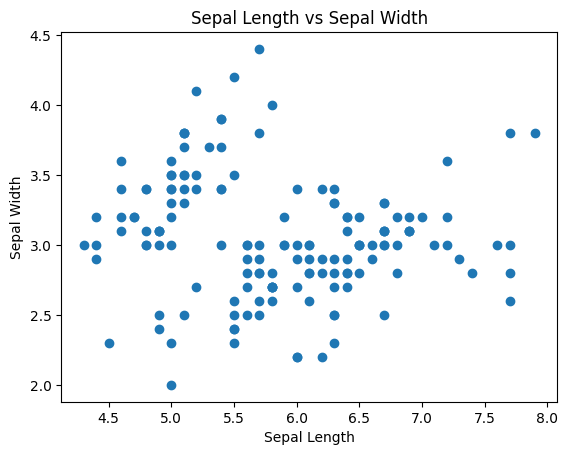

In [102]:
import matplotlib.pyplot as plt

plt.scatter(df['sepal_length'], df['sepal_width'])

plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Sepal Length vs Sepal Width")
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate.

In [103]:
df['petal_length']

0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

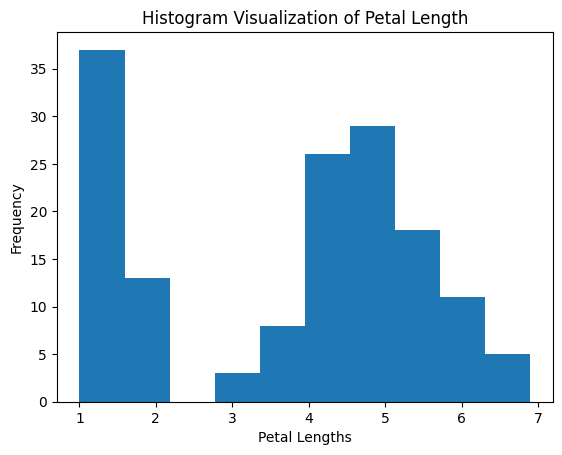

In [120]:
plt.hist(df['petal_length'])
plt.xlabel("Petal Lengths")
plt.ylabel("Frequency")
plt.title("Histogram Visualization of Petal Length")
plt.show()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

<Axes: ylabel='Frequency'>

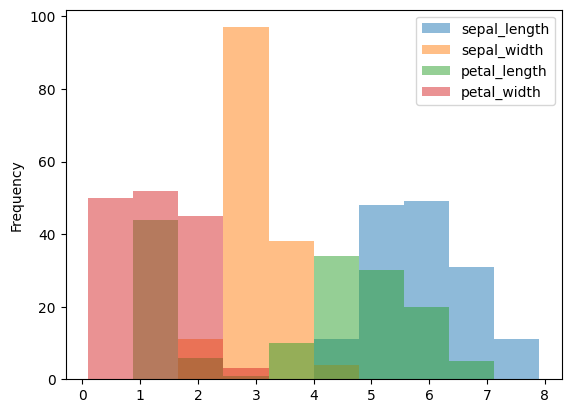

In [105]:
df.plot.hist(alpha=0.5)

array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>]], dtype=object)

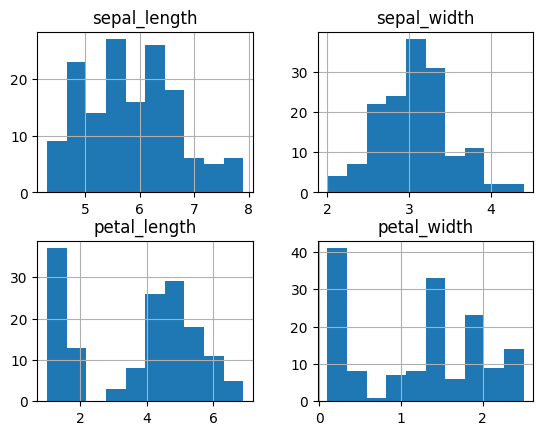

In [106]:
df.hist()

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

<Axes: >

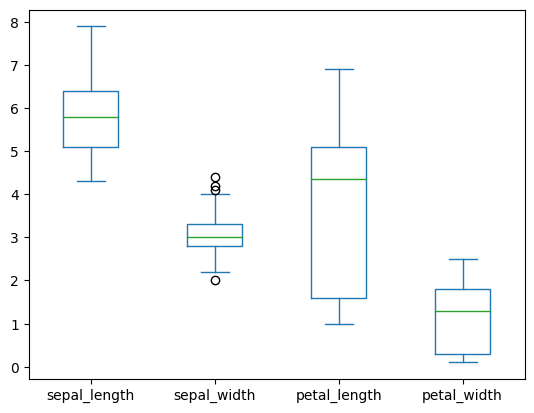

In [107]:
df.plot.box()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html).

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

In [108]:
new_df = pd.melt( df, id_vars=['species'], value_vars=["sepal_length", "sepal_width", "petal_length", "petal_width"])

In [109]:
new_df.columns=['species', 'measurement', 'size']

In [110]:
new_df

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


<Axes: xlabel='measurement', ylabel='size'>

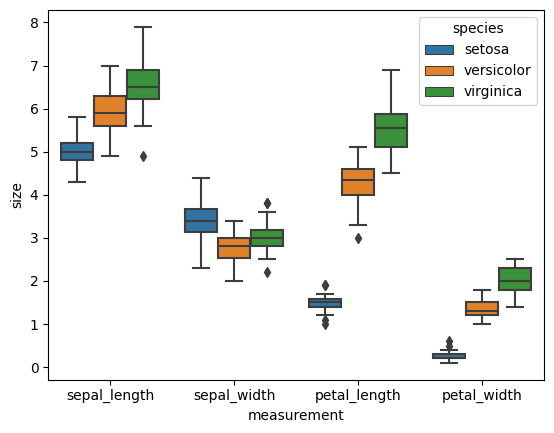

In [111]:
import seaborn as sns
sns.boxplot(x=new_df['measurement'], y=new_df["size"], hue=new_df["species"])

## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

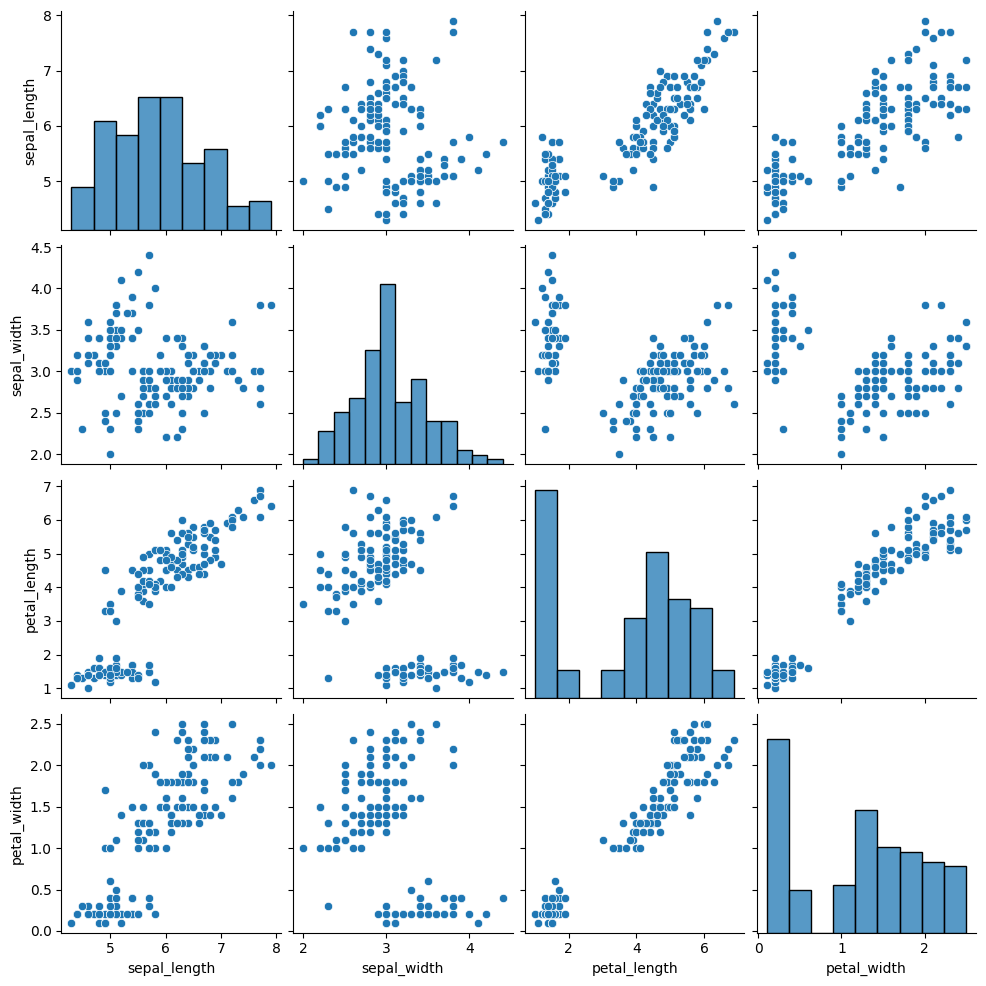

In [112]:
sns.pairplot(df)